#**Mendeteksi Outlier**

Outlier adalah data yang berada jauh dari kumpulan data lainnya dan dapat mempengaruhi hasil analisis secara signifikan.

 Pentingnya menghilangkan outlier dalam proses understanding data tidak bisa diabaikan, karena outlier dapat menyebabkan interpretasi yang salah dan mengurangi kualitas model prediksi.

 Dengan mengidentifikasi dan menghilangkan outlier, kita dapat memastikan bahwa hasil analisis lebih akurat dan mencerminkan pola yang sebenarnya dalam data. Selanjutnya, kita akan melakukan deteksi outlier menggunakan metode K-Nearest Neighbors (KNN),

 sebuah teknik yang cukup sederhana dalam mengidentifikasi anomali berdasarkan kedekatan dengan titik data lain.

Sebelum memulai sebaiknya kita melakukan install library untuk mengkoneksikan kode python dengan database
Database Iris dataset berada di dua jenis database yang berbeda, yaitu Mysql dan PostgreSQL

Untuk mengkoneksikan dengan database Mysql kita dapat gunakan library

- pymysql
- mysql-connector
atau library alternatif lainnya

Untuk mengkoneksikan dengan database PostgreSQL kita dapat gunakan library
- psycopg2
atau library alternatif lainnya

Namun kali ini saya menggunakan pymysql sebagai




Metode K-NN mendeteksi outlier dengan cara menghitung jarak antar titik data dengan titik terdekatnya. Data yang memiliki jarak jauh dari titik lainnya akan dianggap outlier.

Untuk menghitung K-NN secara manual, kita akan:

Menghitung jarak Euclidean antar setiap pasangan data.
Menentukan dua tetangga terdekat


# **Deteksi Outlier dengan Metode K-Nearest Neighbors (KNN)**

## **1. Perhitungan Jarak Euclidean Antar Titik**
Jarak antara dua titik dihitung menggunakan rumus:

$$
d(A,B) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2 + (w_1 - w_2)^2}
$$

dengan:
- \( x \) = sepal_length
- \( y \) = sepal_width
- \( z \) = petal_length
- \( w \) = petal_width

Tabel berikut menunjukkan koordinat setiap titik:

| ID  | (sepal_length, sepal_width, petal_length, petal_width) |
|----|----------------------------------------------|
| 1  | (1.4,| 0.2, 5.1, 3.5)  |
| 2  | (14.0, 2.0, 40.9, 30.0)  |
| 3  | (1.3, 0.2, 4.7, 3.2)  |
| 4  | (1.5, 0.2, 4.6, 3.1)  |
| 5  | (1.4, 0.2, 5.0, 3.6)  |

### **Perhitungan Jarak Euclidean**
1. **Jarak antara ID 1 dan ID 2:**
$$
d(1,2) = \sqrt{(1.4 - 14.0)^2 + (0.2 - 2.0)^2 + (5.1 - 40.9)^2 + (3.5 - 30.0)^2}
$$

$$
= \sqrt{(-12.6)^2 + (-1.8)^2 + (-35.8)^2 + (-26.5)^2}
$$

$$
= \sqrt{158.76 + 3.24 + 1281.64 + 702.25}
$$

$$
= \sqrt{2145.89} \approx 46.31
$$

2. **Jarak antara ID 1 dan ID 3:**
$$
d(1,3) = \sqrt{(1.4 - 1.3)^2 + (0.2 - 0.2)^2 + (5.1 - 4.7)^2 + (3.5 - 3.2)^2}
$$

$$
= \sqrt{(0.1)^2 + (0)^2 + (0.4)^2 + (0.3)^2}
$$

$$
= \sqrt{0.01 + 0 + 0.16 + 0.09}
$$

$$
= \sqrt{0.26} \approx 0.51
$$

3. **Jarak antara ID 1 dan ID 4:**
$$
d(1,4) = \sqrt{(1.4 - 1.5)^2 + (0.2 - 0.2)^2 + (5.1 - 4.6)^2 + (3.5 - 3.1)^2}
$$

$$
= \sqrt{(-0.1)^2 + 0^2 + (0.5)^2 + (0.4)^2}
$$

$$
= \sqrt{0.01 + 0 + 0.25 + 0.16}
$$

$$
= \sqrt{0.42} \approx 0.65
$$

4. **Jarak antara ID 1 dan ID 5:**
$$
d(1,5) = \sqrt{(1.4 - 1.4)^2 + (0.2 - 0.2)^2 + (5.1 - 5.0)^2 + (3.5 - 3.6)^2}
$$

$$
= \sqrt{(0)^2 + (0)^2 + (0.1)^2 + (-0.1)^2}
$$

$$
= \sqrt{0 + 0 + 0.01 + 0.01}
$$

$$
= \sqrt{0.02} \approx 0.14
$$

> Perhitungan serupa dilakukan untuk ID lainnya.

---

## **2. Rata-rata Jarak ke 2 Tetangga Terdekat**
Untuk **k = 2**, rata-rata jarak dihitung dengan mencari dua tetangga terdekat setiap titik dan menghitung rata-rata jarak mereka.

| ID  | K-Tetangga Terdekat | Rata-rata Jarak |
|----|-------------------|---------------|
| 1  | (5, 3) → (0.14, 0.51) | **0.33** |
| 2  | (1, 5) → (46.31, 46.34) | **46.32** |
| 3  | (5, 1) → (0.4, 0.51) | **0.46** |
| 4  | (5, 1) → (0.42, 0.65) | **0.54** |
| 5  | (1, 3) → (0.14, 0.4) | **0.27** |

---

## **Kesimpulan**
- **ID 2 memiliki rata-rata jarak tertinggi (46.32), jauh lebih besar dibandingkan yang lain**.
- **ID 2 adalah outlier** karena jauh dari kelompok data lainnya.


In [ ]:
%pip install pymysql
%pip install psycopg2

## **1. Mengambil Dataset Sepal length dan sepal width dari database mysql**



In [ ]:

import pymysql
import numpy as np
import pandas as pd

def get_mysql_data():
    conn = pymysql.connect(
        host="pendatviomysql-39-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_nnGCVuLriFaCit_hSPr",
        database="myiris",
        port=20305
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")  # Select all records from the table

    data = cursor.fetchall()  # Fetch all rows
    conn.close()
    # Convert to Python list
    data_list = [list(row) for row in data]
    # Convert to NumPy array
    data_numpy = np.array(data_list)
    return data_list
get_mysql_data()

[[1, 'Iris-setosa', 1.4, 0.2],
 [2, 'Iris-setosa', 14.0, 2.0],
 [3, 'Iris-setosa', 1.3, 0.2],
 [4, 'Iris-setosa', 1.5, 0.2],
 [5, 'Iris-setosa', 1.4, 0.2],
 [6, 'Iris-setosa', 1.7, 0.4],
 [7, 'Iris-setosa', 1.4, 0.3],
 [8, 'Iris-setosa', 1.5, 0.2],
 [9, 'Iris-setosa', 1.4, 0.2],
 [10, 'Iris-setosa', 1.5, 0.1],
 [11, 'Iris-setosa', 1.5, 0.2],
 [12, 'Iris-setosa', 1.6, 0.2],
 [13, 'Iris-setosa', 1.4, 0.1],
 [14, 'Iris-setosa', 1.1, 0.1],
 [15, 'Iris-setosa', 1.2, 0.2],
 [16, 'Iris-setosa', 1.5, 0.4],
 [17, 'Iris-setosa', 1.3, 0.4],
 [18, 'Iris-setosa', 1.4, 0.3],
 [19, 'Iris-setosa', 1.7, 0.3],
 [20, 'Iris-setosa', 1.5, 0.3],
 [21, 'Iris-setosa', 1.7, 0.2],
 [22, 'Iris-setosa', 1.5, 0.4],
 [23, 'Iris-setosa', 1.0, 0.2],
 [24, 'Iris-setosa', 1.7, 0.5],
 [25, 'Iris-setosa', 1.9, 0.2],
 [26, 'Iris-setosa', 1.6, 0.2],
 [27, 'Iris-setosa', 1.6, 0.4],
 [28, 'Iris-setosa', 1.5, 0.2],
 [29, 'Iris-setosa', 1.4, 0.2],
 [30, 'Iris-setosa', 1.6, 0.2],
 [31, 'Iris-setosa', 1.6, 0.2],
 [32, 'Iris-seto

Kode Python di atas berfungsi untuk mengambil data dari database MySQL menggunakan library pymysql dan mengonversinya menjadi array NumPy.
 Pertama-tama, kode ini mengimpor library yang diperlukan: pymysql untuk koneksi MySQL, numpy untuk operasi numerik, dan pandas untuk manipulasi data. Fungsi get_mysql_data kemudian didefinisikan untuk menghubungkan ke database MySQL menggunakan kredensial yang diberikan (host, user, password, database, dan port).

 Setelah koneksi berhasil, sebuah cursor dibuat untuk mengeksekusi query SQL "SELECT * FROM irismysql" yang mengambil semua data dari tabel irismysql. Data yang diambil kemudian disimpan dalam variabel data dengan menggunakan metode fetchall(),

  yang mengembalikan semua baris dari hasil query. Koneksi ke database kemudian ditutup supaya tidak bikin lemot .
  Data yang diperoleh dikonversi dari tuple ke list Python menggunakan list comprehension [list(row) for row in data], dan akhirnya dikonversi menjadi array NumPy dengan np.array(data_list). Fungsi ini mengembalikan data dalam bentuk daftar Python.

dapat dilihat dari data tersebut terlihat nilai ekstrim atau outlier pada id ke 2, hal ini di sengaja karena tujuan dari halaman ini adalah untuk mensimulasikan outlier pada data dan cara untuk mendeteksi nya

### **Mensimulasikan Data Outlier pada petal length dan petal width**

Pada data di atas sudah ada outlier yang saya tambahkan pada database, namun jika belum ada outier yang sengaja di tambahkan, maka berikut ini adalah kode untuk memasukkan outlier ke id ke 2

In [ ]:
import pymysql
import numpy as np
import pandas as pd


conn = pymysql.connect(
        host="pendatviomysql-39-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_nnGCVuLriFaCit_hSPr",
        database="myiris",
        port=20305
    )


cursor = conn.cursor()

cursor.execute("UPDATE irismysql SET petal_length = 14.0, petal_width = 2.0 WHERE id = 2")
cursor.execute("SELECT * FROM irismysql WHERE id = 2")
data = cursor.fetchall()  # Fetch all rows
conn.close()
# Convert to Python list
data_list = [list(row) for row in data]

# Convert to NumPy array
data_numpy = np.array(data_list)
print(data_numpy)

[['2' 'Iris-setosa' '14.0' '2.0']]


## **2. Mengambil Dataset petal length dan petal width dari database postgresql**

In [ ]:
import psycopg2
import numpy as np

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-30810f3a-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_zzD9DhqapmhcWhqwe5C",
        database="defaultdb",
        port=20305
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_post")  # Select all records from the table
    data = cursor.fetchall()  # Fetch all rows
    cursor.close()
    conn.close()

    # Convert to Python list
    data_list = [list(row) for row in data]

    # Convert to NumPy array
    data_numpy = np.array(data_list)

    return data_list

get_pg_data()


[[1, 'Iris-setosa', 5.1, 3.5],
 [3, 'Iris-setosa', 4.7, 3.2],
 [4, 'Iris-setosa', 4.6, 3.1],
 [5, 'Iris-setosa', 5.0, 3.6],
 [6, 'Iris-setosa', 5.4, 3.9],
 [7, 'Iris-setosa', 4.6, 3.4],
 [8, 'Iris-setosa', 5.0, 3.4],
 [9, 'Iris-setosa', 4.4, 2.9],
 [10, 'Iris-setosa', 4.9, 3.1],
 [11, 'Iris-setosa', 5.4, 3.7],
 [12, 'Iris-setosa', 4.8, 3.4],
 [13, 'Iris-setosa', 4.8, 3.0],
 [14, 'Iris-setosa', 4.3, 3.0],
 [15, 'Iris-setosa', 5.8, 4.0],
 [16, 'Iris-setosa', 5.7, 4.4],
 [17, 'Iris-setosa', 5.4, 3.9],
 [18, 'Iris-setosa', 5.1, 3.5],
 [19, 'Iris-setosa', 5.7, 3.8],
 [20, 'Iris-setosa', 5.1, 3.8],
 [21, 'Iris-setosa', 5.4, 3.4],
 [22, 'Iris-setosa', 5.1, 3.7],
 [23, 'Iris-setosa', 4.6, 3.6],
 [24, 'Iris-setosa', 5.1, 3.3],
 [25, 'Iris-setosa', 4.8, 3.4],
 [26, 'Iris-setosa', 5.0, 3.0],
 [27, 'Iris-setosa', 5.0, 3.4],
 [28, 'Iris-setosa', 5.2, 3.5],
 [29, 'Iris-setosa', 5.2, 3.4],
 [30, 'Iris-setosa', 4.7, 3.2],
 [31, 'Iris-setosa', 4.8, 3.1],
 [32, 'Iris-setosa', 5.4, 3.4],
 [33, 'Iris-seto

Kode ini mengimpor library psycopg2 untuk koneksi PostgreSQL dan numpy untuk operasi numerik. Fungsi get_pg_data menghubungkan ke database PostgreSQL dengan menggunakan kredensial yang diberikan (host, user, password, database, dan port).

 Setelah koneksi berhasil, fungsi ini membuat cursor untuk mengeksekusi query SQL "SELECT * FROM iris_post", yang mengambil semua data dari tabel iris_post.

 Hasil query disimpan dalam variabel data dengan menggunakan metode fetchall(), yang mengembalikan semua baris dari hasil query tersebut.

 Setelah itu, cursor dan koneksi ke database ditutup untuk memastikan tidak ada kebocoran koneksi.

 Data yang diperoleh dikonversi dari tuple ke list Python menggunakan list comprehension [list(row) for row in data], dan akhirnya dikonversi menjadi array NumPy dengan np.array(data_list). Fungsi ini mengembalikan data dalam bentuk list Python

### **Mensimulasikan Data Outlier pada sepal length dan sepal width**

Pada data di atas sudah ada outlier yang saya tambahkan pada database, namun jika belum ada outier yang sengaja di tambahkan, maka berikut ini adalah kode untuk memasukkan outlier ke id ke 2

In [ ]:
import psycopg2
import numpy as np
import pandas as pd
conn = psycopg2.connect(
        host="pg-30810f3a-projectvioo.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_zzD9DhqapmhcWhqwe5C",
        database="defaultdb",
        port=20305
    )
cursor = conn.cursor()

cursor.execute("UPDATE iris_post SET sepal_length = 40.9, sepal_width = 30.0 WHERE id = 2")
cursor.execute("SELECT * FROM iris_post WHERE id = 2")
data = cursor.fetchall()  # Fetch all rows
conn.close()
# Convert to Python list
data_list = [list(row) for row in data]

# Convert to NumPy array
data_numpy = np.array(data_list)
print(data_numpy)

[['2' 'Iris-setosa' '40.9' '30.0']]


## **3. Menggabungkan Data dari dua database berbeda**


In [ ]:

import pandas as pd
# buat datafrrame

columns = ['id', 'Class', 'sepal_length', 'sepal_width']
data_mysql = pd.DataFrame(get_mysql_data(), columns=columns)

columns = ['id', 'Class', 'petal_length', 'petal_width']
data_pg = pd.DataFrame(get_pg_data(), columns=columns)

# print(data_mysql)

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(data_mysql, data_pg, on=["id", "Class"], how="inner")
print(df_merged)
# df_merged.to_excel("iris2.xlsx",index=True)


      id           Class  sepal_length  sepal_width  petal_length  petal_width
0      1     Iris-setosa           1.4          0.2           5.1          3.5
1      2     Iris-setosa          14.0          2.0          40.9         30.0
2      3     Iris-setosa           1.3          0.2           4.7          3.2
3      4     Iris-setosa           1.5          0.2           4.6          3.1
4      5     Iris-setosa           1.4          0.2           5.0          3.6
..   ...             ...           ...          ...           ...          ...
146  147  Iris-virginica           5.0          1.9           6.3          2.5
147  148  Iris-virginica           5.2          2.0           6.5          3.0
148  149  Iris-virginica           5.4          2.3           6.2          3.4
149  150  Iris-virginica           5.1          1.8           5.9          3.0
150  151             ???           5.1          3.2           5.8          1.0

[151 rows x 6 columns]


## **4. Melakukan deteksi Outlier dengan metode K-NN**

Deteksi outlier menggunakan algoritma K-nearest neighbors (K-NN) melibatkan beberapa langkah untuk mengidentifikasi titik data yang menyimpang secara signifikan dari dataset lainnya.

Awalnya, dataset direpresentasikan dalam ruang multidimensi di mana setiap titik data sesuai dengan satu instance data dengan fitur-fiturnya sebagai koordinat.

Inti dari K-NN adalah menghitung jarak antara titik-titik data untuk menentukan kedekatannya yang pada umum nya menggunakan jarak euclidian . Untuk setiap titik dalam dataset, jarak ke semua titik lain dihitung, dan k tetangga terdekat (k titik terdekat) diidentifikasi.

Rata-rata jarak ke k tetangga ini berfungsi sebagai metrik untuk menilai seberapa jauh suatu titik data. Jika rata-rata jarak ini melebihi ambang batas/ treshold yang telah ditentukan, titik tersebut dianggap sebagai outlier.

In [ ]:
import numpy as np
import pandas as pd


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def calculate_knn_distances(data, k=2):
    distances = []
    for i in range(len(data)):
        distance = []
        for j in range(len(data)):
            if i != j:
                distance.append(euclidean_distance(data[i], data[j]))
        distances.append(sorted(distance)[:k])
    return distances


-  Fungsi euclidian distance digunakan menghitung jarak Euclidean antara dua titik. Jarak Euclidean adalah akar kuadrat dari jumlah kuadrat selisih antara koordinat dari dua titik. yang nanti nya akan di panggil fungsi lainnya


-  Fungsi calculate_knn_distances, Fungsi ini menghitung jarak ke k tetangga terdekat untuk setiap titik dalam data. Langkah-langkahnya:

1. Membuat list kosong untuk menyimpan jarak ke tetangga titik data terdekat.

2. Menghitung jarak Euclidean antara setiap titik dan semua titik lainnya (kecuali dirinya sendiri).

3. Mengurutkan jarak yang dihitung dan menyimpan k jarak terdekat.

4. Mengembalikan list yang diurutkan berdasarkan jarak tetangga terdekat.
yang di tuliskan dengan kode :


```
distances.append(sorted(distance)[:k])
```





In [ ]:
def detect_outliers(data, k=2, threshold=1.0):
    distances = calculate_knn_distances(data, k)
    outliers = []
    for i, d in enumerate(distances):
        if np.mean(d) > threshold:
            outliers.append(i)
    return outliers

Fungsi ini mendeteksi outlier berdasarkan jarak ke tetangga terdekat. Langkah-langkahnya:

Menghitung jarak ke k tetangga terdekat menggunakan fungsi calculate_knn_distances.

ini adalah kode nya :

```
# distances = calculate_knn_distances(data, k)
```

Menginisialisasi daftar outlier kosong.

Menghitung rata-rata jarak ke tetangga terdekat untuk setiap titik.

Menambahkan indeks titik ke daftar outlier jika rata-rata jarak lebih besar dari ambang batas (threshold).

Mengembalikan daftar indeks outlier

In [ ]:
print(df_merged)

      id           Class  sepal_length  sepal_width  petal_length  \
0      1     Iris-setosa           1.4          0.2           5.1   
1      2     Iris-setosa          14.0          2.0          40.9   
2      3     Iris-setosa           1.3          0.2           4.7   
3      4     Iris-setosa           1.5          0.2           4.6   
4      5     Iris-setosa           1.4          0.2           5.0   
..   ...             ...           ...          ...           ...   
146  147  Iris-virginica           5.0          1.9           6.3   
147  148  Iris-virginica           5.2          2.0           6.5   
148  149  Iris-virginica           5.4          2.3           6.2   
149  150  Iris-virginica           5.1          1.8           5.9   
150  151             ???           5.1          3.2           5.8   

     petal_width  outlier  knn_distance  outlier_flag  
0            3.5    False      0.183570         False  
1           30.0     True     43.496896          True  
2  

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def calculate_knn_distances(data, k=2):
    distances = []
    for i in range(len(data)):
        distance = []
        for j in range(len(data)):
            if i != j:
                distance.append(euclidean_distance(data[i], data[j]))
        distances.append(np.mean(sorted(distance)[:k]))  # Ambil rata-rata K terdekat
    return distances

def detect_outliers(data, k=2):
    knn_distances = calculate_knn_distances(data, k)

    #  Menghitung threshold otomatis
    mean_distance = np.mean(knn_distances)
    std_distance = np.std(knn_distances)
    threshold = mean_distance + (2 * std_distance)

    #  Menandai outliers berdasarkan threshold
    outlier_flags = [dist > threshold for dist in knn_distances]

    return knn_distances, outlier_flags, threshold

# copy dataframe
datapd= df_merged.copy(deep=True)

# Konversi DataFrame ke NumPy array
data = datapd[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

k = 2  # Jumlah tetangga

#  Hitung jarak KNN dan deteksi outlier dengan threshold otomatis
datapd['knn_distance'], datapd['outlier_flag'], threshold = detect_outliers(data, k)

# Pastikan tipe data konsisten
datapd['knn_distance'] = datapd['knn_distance'].astype(float)

# Menampilkan hasil
display(datapd)  # Tampilkan DataFrame secara rapi di Jupyter
print(f"Threshold otomatis untuk outlier: {threshold:.4f}")
print(datapd.to_string())  # Jika ingin melihat semua data dalam format teks

#  Menampilkan hanya data yang terdeteksi sebagai outlier
outliers_data = datapd[datapd['outlier_flag']]
print("\nOutliers IDs:", outliers_data['id'].values)
display(outliers_data)  # Tampilkan outliers secara rapi di Jupyter


,id,Class,sepal_length,sepal_width,petal_length,petal_width,knn_distance,outlier_flag
0,1,Iris-setosa,1.4,0.2,5.1,3.5,0.120711,False
1,2,Iris-setosa,14.0,2.0,40.9,30.0,42.867264,True
2,3,Iris-setosa,1.3,0.2,4.7,3.2,0.193185,False
3,4,Iris-setosa,1.5,0.2,4.6,3.1,0.157313,False
4,5,Iris-setosa,1.4,0.2,5.0,3.6,0.157313,False
...,...,...,...,...,...,...,...,...
146,147,Iris-virginica,5.0,1.9,6.3,2.5,0.309557,False
147,148,Iris-virginica,5.2,2.0,6.5,3.0,0.285008,False
148,149,Iris-virginica,5.4,2.3,6.2,3.4,0.272474,False
149,150,Iris-virginica,5.1,1.8,5.9,3.0,0.299535,False


Threshold otomatis untuk outlier: 7.4937
      id            Class  sepal_length  sepal_width  petal_length  petal_width  knn_distance  outlier_flag
0      1      Iris-setosa           1.4          0.2           5.1          3.5      0.120711         False
1      2      Iris-setosa          14.0          2.0          40.9         30.0     42.867264          True
2      3      Iris-setosa           1.3          0.2           4.7          3.2      0.193185         False
3      4      Iris-setosa           1.5          0.2           4.6          3.1      0.157313         False
4      5      Iris-setosa           1.4          0.2           5.0          3.6      0.157313         False
5      6      Iris-setosa           1.7          0.4           5.4          3.9      0.339036         False
6      7      Iris-setosa           1.4          0.3           4.6          3.4      0.244091         False
7      8      Iris-setosa           1.5          0.2           5.0          3.4      0.120711  

,id,Class,sepal_length,sepal_width,petal_length,petal_width,knn_distance,outlier_flag
1,2,Iris-setosa,14.0,2.0,40.9,30.0,42.867264,True


## **Mencari K optimal dengan Elbow method**

Nilai K optimal adalah: 1


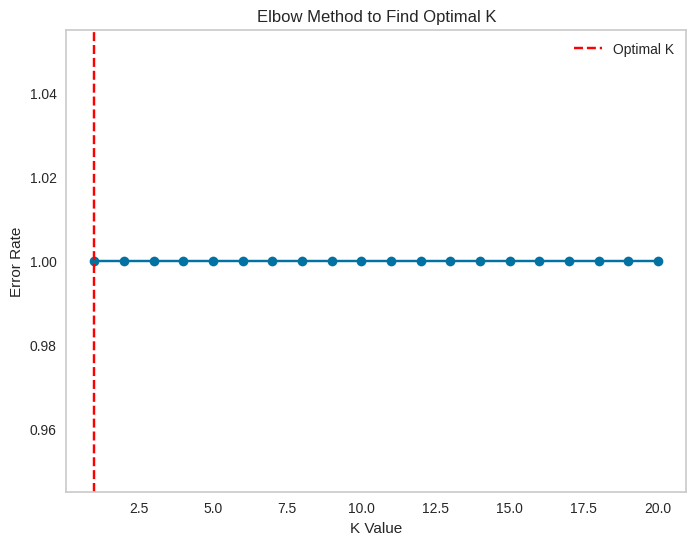

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ambil data fitur dan target
X = df_merged[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df_merged['id']  # target

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisikan range untuk K
k_values = range(1, 21)
error_rates = []

# Evaluasi K untuk setiap nilai
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Cari nilai K optimal dengan error rate terendah
optimal_k = k_values[np.argmin(error_rates)]
print(f"Nilai K optimal adalah: {optimal_k}")

# Plot hasil Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal K')
plt.axvline(x=k_values[np.argmin(error_rates)], linestyle='--', color='red', label="Optimal K")
plt.legend()
plt.grid()
plt.show()


 Kode di atas adalah kode mencari K optimal pada metode K-NN
 Langkah pertama adalah menyiapkan dataset dengan memilih kolom fitur seperti sepal_length, sepal_width, petal_length, dan petal_width dari dataframe df_merged, serta menggunakan kolom id sebagai target.
 Setelah itu, dataset dibagi menjadi data latih (training) dan data uji (testing) menggunakan fungsi train_test_split. Selanjutnya, algoritma KNN dilatih dan dievaluasi untuk berbagai nilai K (dalam rentang 1 hingga 20).

 Untuk setiap nilai K, prediksi dilakukan pada data uji, dan tingkat kesalahan (error rate) dihitung sebagai 1 dikurangi akurasi prediksi. Semua nilai error rate kemudian dipetakan terhadap nilai K dalam grafik untuk memvisualisasikan tren. Titik optimal (elbow) ditandai sebagai nilai K dengan error rate terendah

 karena data masih kotor dengan outlier pada id =2  K optimal kemungkinan masih belum benar